# Graphing GSEA HALLMARK pathways for CD38+CD39+ and CD38-CD39+ populations in Teee RNAseq
 ### https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html
  ### *GSEA desktop application 
  ### *https://www.pnas.org/doi/abs/10.1073/pnas.0506580102
## data analyzed by GSEA 01Sept2022
### file folder Teee_pp_np.Gsea.1662074746687

In [17]:
#import libraries
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

## Graphing the pathways based on NES value
### Normalized Enrichment Score (NES)
#### primary statistic for examining gene set enrichment results
#### accounts for differences in gene set size and in correlations between gene sets and the expression dataset
#### NES can be used to compare analysis results across gene sets

In [3]:
# from the GSEA output folder: 
#read in files for the pos_pos (double positive) and neg_neg (double negative) reports
# gsea_report_for_pos_pos_1662067284673.tsv
# gsea_report_for_neg_neg_1662067284673.tsv
df_pp = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_np.Gsea.1662074746687/gsea_report_for_pp_1662074746687.tsv', delimiter = '\t')
df_np = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_np.Gsea.1662074746687/gsea_report_for_np_1662074746687.tsv', delimiter = '\t')

## merge/join/concatenate the two dataframes- pp and pp  pathway scores for making one graph.

In [4]:
# df_pp the pos_pos file
# df_np the neg_pos file

df_combine = pd.concat([df_pp, df_np], axis=0)

In [5]:
# combined file should have all 50 pathways 
df_combine.shape

(50, 12)

In [6]:
# Columns will have name of pathways and GSEA statistics 
list(df_combine.columns) 

['NAME',
 'GS<br> follow link to MSigDB',
 'GS DETAILS',
 'SIZE',
 'ES',
 'NES',
 'NOM p-val',
 'FDR q-val',
 'FWER p-val',
 'RANK AT MAX',
 'LEADING EDGE',
 'Unnamed: 11']

In [7]:
#rename columns for graphing purposes (get rid of spaces and dashes)
df_combine=df_combine.rename(columns={'FDR q-val': 'FDR_qval', 'NOM p-val': 'NOM_pval'})

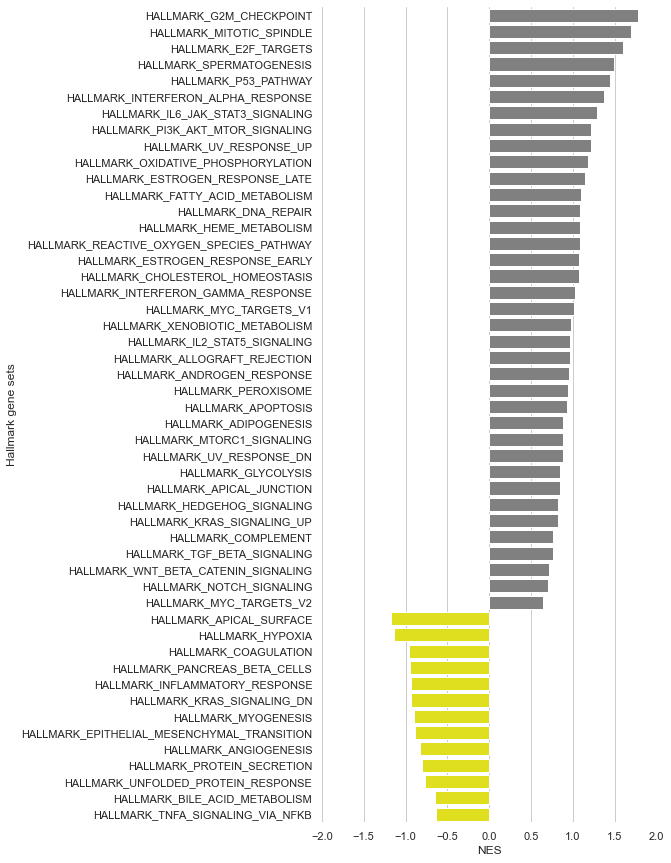

In [8]:
#graph a barplot based on NES score 
sns.set_theme(style="whitegrid")

# dataframe used is the combined df
data = df_combine 

# color the bars based on NES values
palette=["yellow" if x<0 else 'gray' for x in data.NES] 


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

#plot NES and pathway name
sns.barplot(x="NES", y="NAME", data = df_combine, palette=palette)

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-2, 2), ylabel="Hallmark gene sets")
sns.despine(left=True, bottom=True)

#save/write the file
#plt.savefig("Fig_name_here.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Cluster/Heatmap on the genes in top pathway of the pos_pos cell population
#### Seaborn clustermap
#### https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=cluster#seaborn.clustermap
#### Example: the APOPTOSIS pathway

### NOTE:  these heatmaps will look slightly different than the ones generated by GSEA 

In [10]:
#read in gct file; skip first two rows of this file
df_APOP = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_np.Gsea.1662074746687/HALLMARK_APOPTOSIS.gct', 
                     skiprows=2, delimiter = '\t')

In [11]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_APOP_viz= df_APOP.drop(columns=['DESCRIPTION'])
df_APOP_viz= df_APOP_viz.set_index(df_APOP_viz.columns[0])
df_APOP_viz= df_APOP_viz.rename_axis('Gene_Name')

In [12]:
df_APOP_viz.head()

,Sample_1_CD38_pos_CD39_pos,Sample_2_CD38_pos_CD39_pos,Sample_3_CD38_pos_CD39_pos,Sample_1_CD38_neg_CD39_pos,Sample_2_CD38_neg_CD39_pos,Sample_3_CD38_neg_CD39_pos
Gene_Name,,,,,,
CASP9,952.6876,867.81530,905.28310,311.429570,306.561920,436.219670
CD38,2247.1838,2260.06570,887.39210,50.275627,71.868000,55.473020
BRCA1,405.6758,176.06038,187.25882,23.741268,5.614687,15.129005
CDC25B,6526.8860,9424.84900,9594.33100,3624.034700,4891.515600,4416.408700
SAT1,22542.2100,24553.55500,34435.34800,9796.066000,17156.238000,12957.993000


In [13]:
# matrix should be 142 genes and 6 samples
df_APOP_viz.shape

(142, 6)

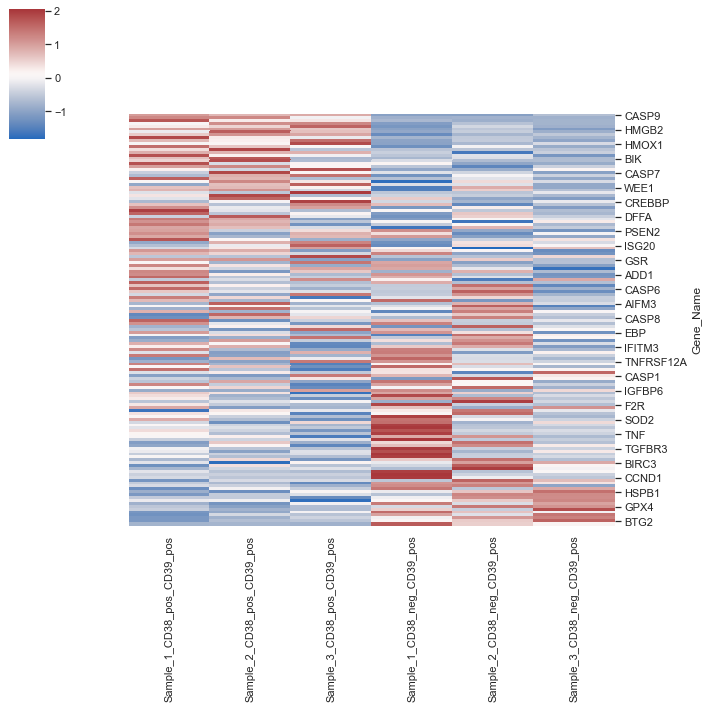

In [14]:
# z-score across rows (0)
g = sns.clustermap(df_APOP_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False )

# not all 193 genes are shown, likely due to figsize dimensions

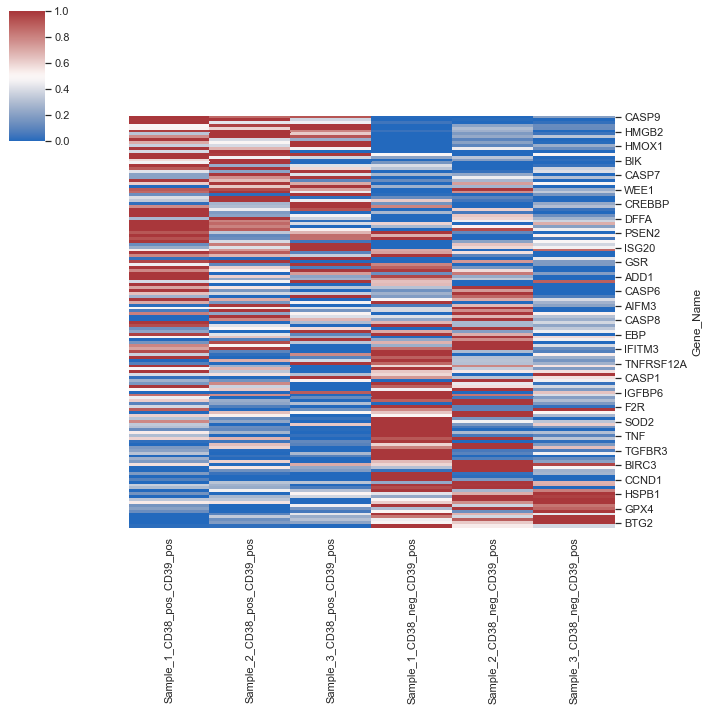

In [15]:
# standard_scale across rows (0)
g = sns.clustermap(df_APOP_viz, standard_scale=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False)

# not all 193 genes are shown, likely due to figsize dimensions

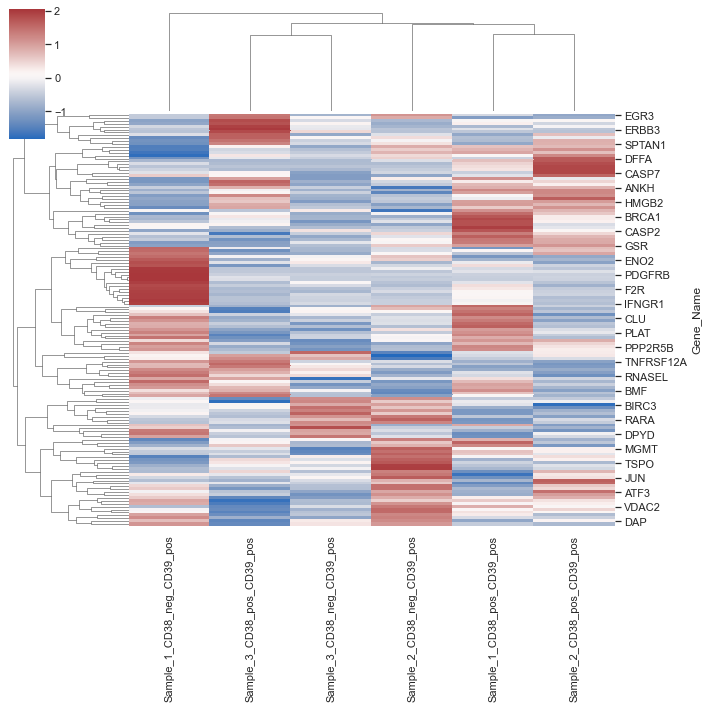

In [16]:
# z-score across rows (0)
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_APOP_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=True, col_cluster=True )

# not all 193 genes are shown, likely due to figsize dimensions

# Additional downstream analysis of GSEA results
## how to identify important genes and reduce dimensioanlity of enriched gene sets?
## Leading Edge Analysis 
#### "leading-edge subset in a gene set are those genes that appear in the ranked list at or before the point at which the running sum reaches its maximum deviation from zero. The leading-edge subset can be interpreted as the core that accounts for the gene set’s enrichment signal"
### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5066188/

## Nonnegative Factorization to reduce dimensionality?
### http://ai.stanford.edu/~marinka/nimfa/
#### Tan et al 2016.  designed an analysis approach to identify sub-signatures of genes called “leading edge metagenes” (LEMs); non-negative matrix factorization (NMF) https://www.biorxiv.org/content/10.1101/043158v1.full

In [18]:
#perform Leading Edge Analysis in GSEA desktop application
#the pp_np GSEA results
#output files in folder my_analysis.LeadingEdgeTool.1662144278805

In [20]:
#read in the gct file from the Leading Edge Analysis
#matrix of the 50 Hallmark pathways and Genes in that subset that account for the pathway's enrichment signal
#binary: 1 if the gene is found in that pathway
#some genes may be identified in more than one pathway (ie overlapping)
df_le= pd.read_csv('/Users/carol/gsea_home/output/sep02/my_analysis.LeadingEdgeTool.1662144278805/leading_edge_matrix_for_results.8.gct', 
                   skiprows=2, delimiter = '\t')

In [22]:
#this comparison has 1235 genes identified as 'leading-edge'
df_le.shape

(50, 1235)

In [23]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_le_viz= df_le.drop(columns=['DESCRIPTION'])
df_le_viz= df_le_viz.set_index(df_le_viz.columns[0])
df_le_viz= df_le_viz.rename_axis('Pathway_Name')

/Users/carol/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


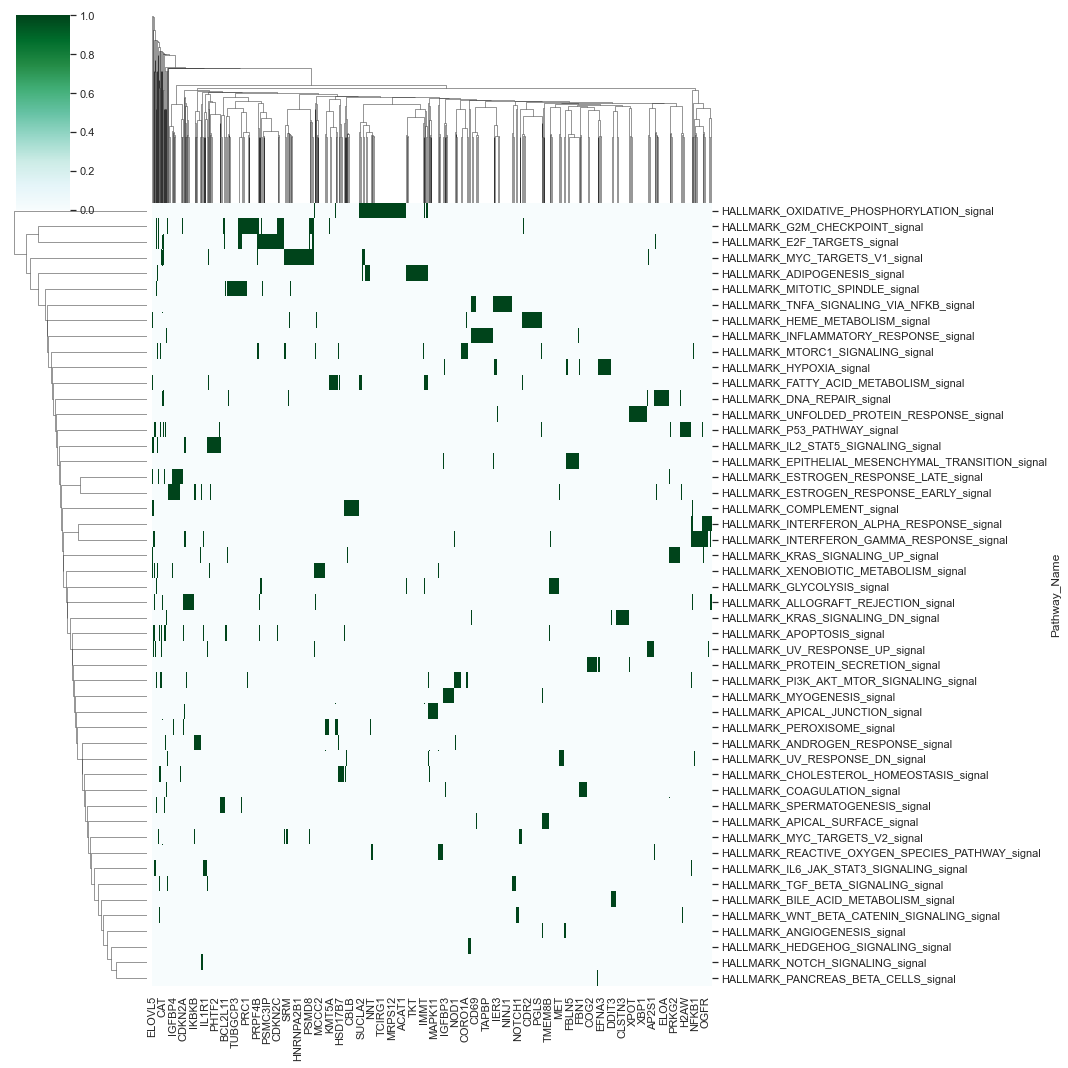

In [24]:
#cluster?
# binary: 1 if the gene is found in that pathway
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_le_viz, cmap="BuGn", figsize= (15, 15),
                 row_cluster=True, col_cluster=True )

In [25]:
#number of leading edge genes in the pathway
df_le_viz.sum(axis=1)

Pathway_Name
HALLMARK_G2M_CHECKPOINT_signal                        92.0
HALLMARK_MITOTIC_SPINDLE_signal                       56.0
HALLMARK_E2F_TARGETS_signal                           91.0
HALLMARK_SPERMATOGENESIS_signal                       18.0
HALLMARK_P53_PATHWAY_signal                           44.0
HALLMARK_INTERFERON_ALPHA_RESPONSE_signal             26.0
HALLMARK_IL6_JAK_STAT3_SIGNALING_signal               15.0
HALLMARK_PI3K_AKT_MTOR_SIGNALING_signal               29.0
HALLMARK_UV_RESPONSE_UP_signal                        29.0
HALLMARK_OXIDATIVE_PHOSPHORYLATION_signal            113.0
HALLMARK_ESTROGEN_RESPONSE_LATE_signal                41.0
HALLMARK_FATTY_ACID_METABOLISM_signal                 48.0
HALLMARK_DNA_REPAIR_signal                            44.0
HALLMARK_HEME_METABOLISM_signal                       54.0
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY_signal       17.0
HALLMARK_ESTROGEN_RESPONSE_EARLY_signal               38.0
HALLMARK_CHOLESTEROL_HOMEOSTASIS_signal    

In [26]:
#number of pathways the gene is associated
df_le_viz.sum(axis=0)

ZNF292     1.0
RBPJ       1.0
MYLK       1.0
PSMD8      1.0
PREX1      1.0
          ... 
PIKFYVE    1.0
WEE1       1.0
SCD        3.0
BAX        1.0
LTBR       1.0
Length: 1233, dtype: float64